# Notizen zum Thema Sortieren
Die Notizen sind in Obsidian zu finden unter "Sortieralgorithmen.

# Nachbearbeitung
## Aufgaben zu Sortierungsverfahren
### Insertion Sort (Sortieren durch Einfügen)
Beim Insertion Sort wird das Array in zwei Teile geteilt: einen sortierten und einen unsortierten Teil. Anfangs besteht der sortierte Teil nur aus dem ersten Element. Dann wird jedes weitere Element aus dem unsortierten Teil genommen und an der richtigen Stelle im sortierten Teil eingefügt.

Schnelligkeit: O(n^2) im Durchschnitt und im schlimmsten Fall, O(n) im besten Fall (wenn das Array bereits sortiert ist).

Kurzbeschreibung des Algorithmus:
- Die äußere Schleife geht durch jedes Element ab Index 1.
- Die innere Schleife verschiebt alle Elemente, die größer als key sind.
- Am Ende wird key an der passenden Stelle eingefügt.

Folgend der Algorithmus in Python mit In-Place-Sortierung:

In [ ]:
def insertion_sort(arr):
    # Iterieren durch alle Elemente im Array beginnend mit dem zweiten
    for i in range(1, len(arr)):
        key = arr[i]  # Merken des aktuellen Elements
        j = i - 1  # Index des linken Elements des aktuellen Elements

        # Verschiebe alle größeren Elemente nach rechts
        while j >= 0 and arr[j] > key:  # Solange das linke Element größer ist als das aktuelle
            arr[j + 1] = arr[j]  # Verschiebe das linke Element nach rechts
            j -= 1  # Gehe zum nächsten linken Element

        # Füge das Element an der richtigen Stelle ein
        arr[j + 1] = key


numbers = [5, 2, 9, 1, 5, 6]
insertion_sort(numbers)
print("Sorted Array:", numbers)


### Quicksort für int-Arrays
Quicksort ist ein effizienter, rekursiver Sortieralgorithmus, der das "Teile und Herrsche"-Prinzip verwendet. Er wählt ein "Pivot"-Element aus dem Array und partitioniert die anderen Elemente in zwei Unter-Arrays: diejenigen, die kleiner als das Pivot sind, und diejenigen, die größer sind. Dann wird der gleiche Prozess rekursiv auf die beiden Unter-Arrays angewendet.

Schnelligkeit: O(n log n) im Durchschnitt und im besten Fall, O(n^2) im schlimmsten Fall (wenn das Array bereits sortiert ist und das schlechteste Pivot gewählt wird).

Kurzbeschreibung des Algorithmus:
- Wähle ein Pivot-Element aus dem Array.
- Partitioniere das Array in zwei Teile: Elemente kleiner als das Pivot und Elemente größer als das Pivot.
- Wende den Quicksort rekursiv auf die beiden Teile an.

Hier der Algorithmus in Python mit Rückgabe eines neuen sortierten Arrays (NICHT In-Place):

In [ ]:
def quicksort(arr):
    # Wenn das Array 0 oder 1 Elemente hat, ist es bereits sortiert
    if len(arr) <= 1:
        return arr

    # Wähle ein Pivot-Element (hier das mittlere)
    pivot = arr[len(arr) // 2]

    # Teile das Array in drei Teile:
    # - Elemente kleiner als das Pivot
    # - Elemente gleich dem Pivot
    # - Elemente größer als das Pivot
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    # Rekursives Sortieren der linken und rechten Teile
    return quicksort(left) + middle + quicksort(right)


# Beispiel zum Testen
numbers = [10, 7, 8, 9, 1, 5]
sorted_numbers = quicksort(numbers)
print("Sorted array:", sorted_numbers)


### Testen der Geschwindigkeit der obigen Algorithmen
Das Ziel ist herauszufinden, welcher Algorithmus bei verschiedenen Eingabegrößen schneller ist.

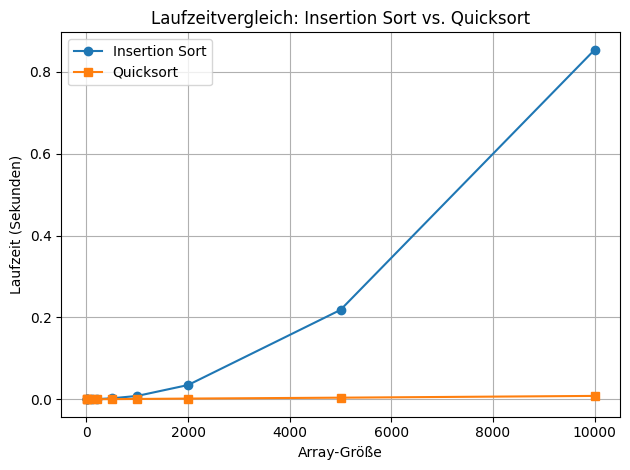

In [10]:
import random
import time

import matplotlib.pyplot as plt

# Testgrößen definieren
sizes = [5, 10, 15, 100, 200, 500, 1000, 2000, 5000, 10000]
insertion_times = []
quicksort_times = []

for size in sizes:
    # Zufälliges Array generieren
    test_array = [random.randint(0, 10000) for _ in range(size)]

    # Insertion Sort testen
    arr_copy = test_array.copy()
    start = time.perf_counter()
    insertion_sort(arr_copy)
    end = time.perf_counter()
    insertion_times.append(end - start)

    # Quicksort testen
    arr_copy = test_array.copy()
    start = time.perf_counter()
    quicksort(arr_copy)
    end = time.perf_counter()
    quicksort_times.append(end - start)

# Ergebnisse visualisieren
plt.plot(sizes, insertion_times, label='Insertion Sort', marker='o')
plt.plot(sizes, quicksort_times, label='Quicksort', marker='s')
plt.xlabel('Array-Größe')
plt.ylabel('Laufzeit (Sekunden)')
plt.title('Laufzeitvergleich: Insertion Sort vs. Quicksort')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Angepasster Quicksort
Der Quicksort wird hier so angepasst, dass er bei kleinen Arrays (z.B. < 10 Elemente) den Insertion Sort verwendet, da dieser bei kleinen Datenmengen oft schneller ist.

In [5]:
def quicksort_optimized(arr):
    # Wenn das Array 0 oder 1 Elemente hat, ist es bereits sortiert
    if len(arr) <= 15:
        return insertion_sort(arr)

    # Wähle ein Pivot-Element (hier das mittlere)
    pivot = arr[len(arr) // 2]

    # Teile das Array in drei Teile:
    # - Elemente kleiner als das Pivot
    # - Elemente gleich dem Pivot
    # - Elemente größer als das Pivot
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    # Rekursives Sortieren der linken und rechten Teile
    return quicksort(left) + middle + quicksort(right)

### Vergleich der Verbesserung
Der folgende Code vergleicht die Laufzeiten des normalen Quicksort mit dem optimierten Quicksort.

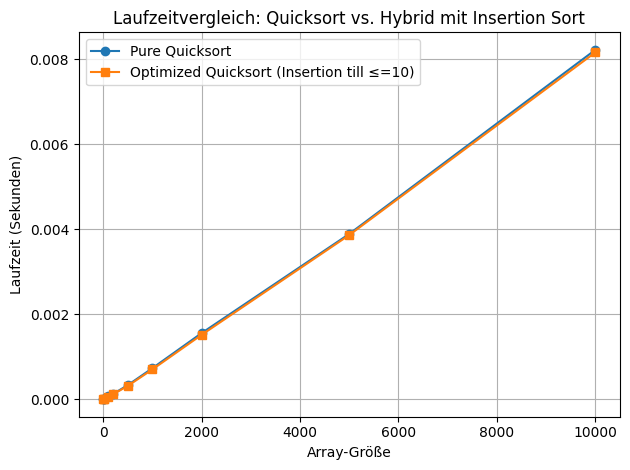

In [11]:
# Testgrößen
sizes = [5, 10, 15, 100, 200, 500, 1000, 2000, 5000, 10000]
pure_times = []
hybrid_times = []

for size in sizes:
    test_array = [random.randint(0, 10000) for _ in range(size)]

    # Reines Quicksort
    arr_copy = test_array.copy()
    start = time.perf_counter()
    quicksort(arr_copy)
    end = time.perf_counter()
    pure_times.append(end - start)

    # Hybrid Quicksort
    arr_copy = test_array.copy()
    start = time.perf_counter()
    quicksort_optimized(arr_copy)
    end = time.perf_counter()
    hybrid_times.append(end - start)

# Visualisierung
plt.plot(sizes, pure_times, label='Pure Quicksort', marker='o')
plt.plot(sizes, hybrid_times, label='Optimized Quicksort (Insertion till ≤=10)', marker='s')
plt.xlabel('Array-Größe')
plt.ylabel('Laufzeit (Sekunden)')
plt.title('Laufzeitvergleich: Quicksort vs. Hybrid mit Insertion Sort')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Heapsort für Teilstück eines Array
Heapsort ist ein Vergleichs-Sortieralgorithmus, der auf der Datenstruktur "Heap" basiert. Er funktioniert in zwei Hauptphasen: Zuerst wird ein Max-Heap aus den Daten erstellt, und dann wird das größte Element (die Wurzel des Heaps) entfernt und an das Ende des Arrays gesetzt. Dieser Prozess wird wiederholt, bis alle Elemente sortiert sind.

Schnelligkeit: O(n log n) im Durchschnitt, im besten und im schlimmsten Fall.

Kurzbeschreibung des Algorithmus:
- Baue einen Max-Heap aus dem Array.
- Wiederhole das Entfernen des größten Elements und das Wiederherstellen des Heaps, bis das Array sortiert ist.

Hier der Algorithmus in Python, der ein Teilstück eines Arrays sortiert (In-Place):

In [ ]:
def heapsort_subarray(arr, start_index, end_index):
    # Hilfsfunktion: Heapify für ein Teilstück
    def heapify(array, subarray_length, heap_index, offset):
        largest = heap_index
        left = 2 * heap_index + 1
        right = 2 * heap_index + 2

        # Berechne die echten Indizes im Original-Array
        real_i = offset + heap_index
        real_left = offset + left
        real_right = offset + right

        # Vergleiche mit linkem Kind
        if left < subarray_length and array[real_left] > array[real_i]:
            largest = left

        # Vergleiche mit rechtem Kind
        if right < subarray_length and array[real_right] > array[offset + largest]:
            largest = right

        # Falls nötig, tausche und rekursiv heapify
        if largest != heap_index:
            array[real_i], array[offset + largest] = array[offset + largest], array[real_i]
            heapify(array, subarray_length, largest, offset)

    n = end_index - start_index

    # Baue Max-Heap im Teilstück
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, start_index)

    # Sortiere das Teilstück durch Heap-Extraktion
    for i in range(n - 1, 0, -1):
        # Tausche erstes und letztes Element im Heap-Bereich
        arr[start_index], arr[start_index + i] = arr[start_index + i], arr[start_index]
        heapify(arr, i, 0, start_index)


# Beispiel: Nur die Elemente von Index 2 bis 6 sortieren
data = [9, 3, 7, 1, 8, 2, 5, 4]
heapsort_subarray(data, 2, 7)
print("Teilweise sortiertes Array:", data)


### Quicksort (optimiert) mit Rekursionstiefe begrenzen
Der folgende Quicksort-Algorithmus begrenzt die Rekursionstiefe, um Stack Overflow zu vermeiden. Wenn die maximale Tiefe erreicht ist, wird auf Heapsort umgeschaltet. Bei kleinen Teilarrays wird Insertion Sort verwendet. Schwellenwert für Rekursionstiefe = 2 * log2(n).

In [ ]:
import math


# Insertion Sort für kleine Teilarrays
def insertion_sort_subarray(arr, start_index=0, end_index=None):
    if end_index is None:
        end_index = len(arr)
    for i in range(start_index + 1, end_index):
        key = arr[i]
        j = i - 1
        while j >= start_index and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


# Introsort: Kombination aus Quicksort, Insertion Sort und Heapsort
def introsort(arr, start_index=0, end_index=None, depth_limit=None, threshold=16):
    if end_index is None:
        end_index = len(arr)
    if depth_limit is None:
        depth_limit = 2 * math.floor(math.log2(end_index - start_index)) if end_index - start_index > 0 else 0

    sort_size = end_index - start_index

    # Für kleine Teilarrays: Insertion Sort
    if sort_size <= threshold:
        insertion_sort_subarray(arr, start_index, end_index)
        return

    # Wenn Rekursionstiefe überschritten: Heapsort
    if depth_limit == 0:
        heapsort_subarray(arr, start_index, end_index)
        return

    # Quicksort-Schritt
    pivot = arr[start_index + (sort_size // 2)]
    left = start_index
    right = end_index - 1

    while left <= right:
        while arr[left] < pivot:
            left += 1
        while arr[right] > pivot:
            right -= 1
        if left <= right:
            arr[left], arr[right] = arr[right], arr[left]
            left += 1
            right -= 1

    # Rekursiver Aufruf mit reduzierter Tiefe
    introsort(arr, start_index, right + 1, depth_limit - 1, threshold)
    introsort(arr, left, end_index, depth_limit - 1, threshold)


# Beispiel zum Testen
data = [random.randint(0, 10000) for _ in range(1000)]
introsort(data)
print("Sorted array:", data)